### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

from config import password
from config import username
from config import host

#### Create Engine and Pass in PostgreSQL Connection

In [2]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:5432/emploee_SQL')
connection = engine.connect()

#### Query All Records in the Salary Table

In [3]:
salary_data = pd.read_sql("SELECT * FROM salary", connection)
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


#### Query All Records in the Title Table

In [4]:
title_data = pd.read_sql("SELECT * FROM title", connection)
title_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


#### Query All Records in the Employee info Table

In [5]:
employee_data = pd.read_sql("SELECT * FROM employee_info", connection)
employee_data.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


#### Renamed the title table column - title_id to emp_title

In [6]:
title_data_rename = title_data.rename(columns={"title_id": "emp_title"})
title_data_rename.head(10)

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


#### Combine employee information and title tables on employee title

In [7]:
employee_title_combine = pd.merge(employee_data, title_data_rename, on="emp_title", how="inner")
employee_title_combine.head(100)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff
...,...,...,...,...,...,...,...,...
95,441662,s0001,1964-02-08,Hongzhu,Chenney,F,1992-07-07,Staff
96,41986,s0001,1956-05-11,Conal,Wilfing,F,1985-09-18,Staff
97,11012,s0001,1953-09-12,Taegyun,Speckmann,F,1986-12-28,Staff
98,67762,s0001,1952-07-27,Jeanna,Francisci,F,1985-08-21,Staff


#### Combine above table and salary tables on employee number

In [8]:
combine_salary = pd.merge(employee_title_combine, salary_data, on="emp_no", how="inner")
combine_salary.head(100)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016
...,...,...,...,...,...,...,...,...,...
95,441662,s0001,1964-02-08,Hongzhu,Chenney,F,1992-07-07,Staff,56350
96,41986,s0001,1956-05-11,Conal,Wilfing,F,1985-09-18,Staff,67430
97,11012,s0001,1953-09-12,Taegyun,Speckmann,F,1986-12-28,Staff,72092
98,67762,s0001,1952-07-27,Jeanna,Francisci,F,1985-08-21,Staff,43430


#### Renaming the column headers for the combined table

In [9]:
combine_salary_rename = combine_salary.rename(columns={"emp_no": "employee_number", "emp_title" : "employee_title_code", "title" : "employee_title"})
combine_salary_rename.head(10)

,employee_number,employee_title_code,birth_date,first_name,last_name,sex,hire_date,employee_title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016
5,476443,s0001,1952-08-27,Ziya,Asmuth,M,1995-08-24,Staff,63371
6,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,Staff,60678
7,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,Staff,63377
8,280408,s0001,1964-09-19,Elliott,Perl,M,1987-10-29,Staff,75963
9,229010,s0001,1961-11-12,Mark,Cappelli,M,1990-05-07,Staff,40000


#### Reordered the column headers

In [10]:
new_df = combine_salary_rename[['employee_number', 'employee_title_code', 'employee_title', 'first_name', 'last_name', 'sex', 'birth_date', 'salary']]
new_df.head()

,employee_number,employee_title_code,employee_title,first_name,last_name,sex,birth_date,salary
0,473302,s0001,Staff,Hideyuki,Zallocco,M,1953-07-25,40000
1,421786,s0001,Staff,Xiong,Verhoeff,M,1957-09-28,40000
2,273487,s0001,Staff,Christoph,Parfitt,M,1957-04-14,56087
3,246449,s0001,Staff,Subbu,Bultermann,F,1958-03-23,87084
4,48085,s0001,Staff,Venkatesan,Gilg,M,1964-01-19,63016


#### Plotting histogram of common salary ranges for employees & saving image

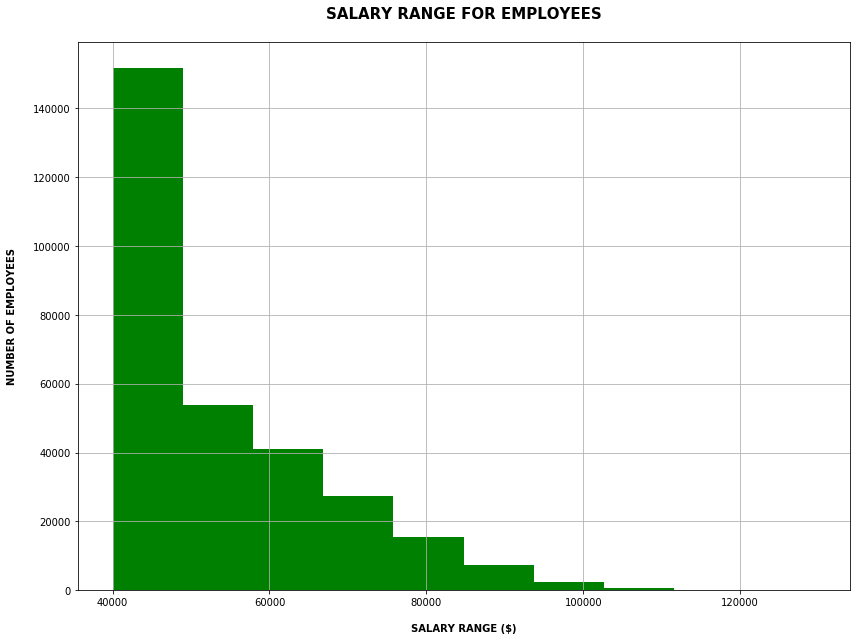

In [11]:
#Set histogram figure size
plt.figure(figsize=(12,9))

#Plot histogram from new_df 
plt.hist(new_df["salary"], alpha=1, color = 'green');

#Set lables and title
plt.xlabel("\nSALARY RANGE ($)", weight="bold", size=10);
plt.ylabel("NUMBER OF EMPLOYEES\n", weight="bold", size=10);
plt.title("SALARY RANGE FOR EMPLOYEES\n", weight="bold", size=15)

plt.grid()
plt.tight_layout()


#Save the figure
output_path = os.path.join(".", "images", "salary_range_employees.png")
plt.savefig(output_path)
plt.show()

#### Calculating average salary by title.

In [12]:
avg_sal_by_title = new_df.groupby(['employee_title'])['salary'].mean()
avg_sal_by_title.round(2)
avg_sal_by_title = avg_sal_by_title.reset_index()
avg_sal_by_title

,employee_title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


#### Create a bar chart of average salary by title & saving image

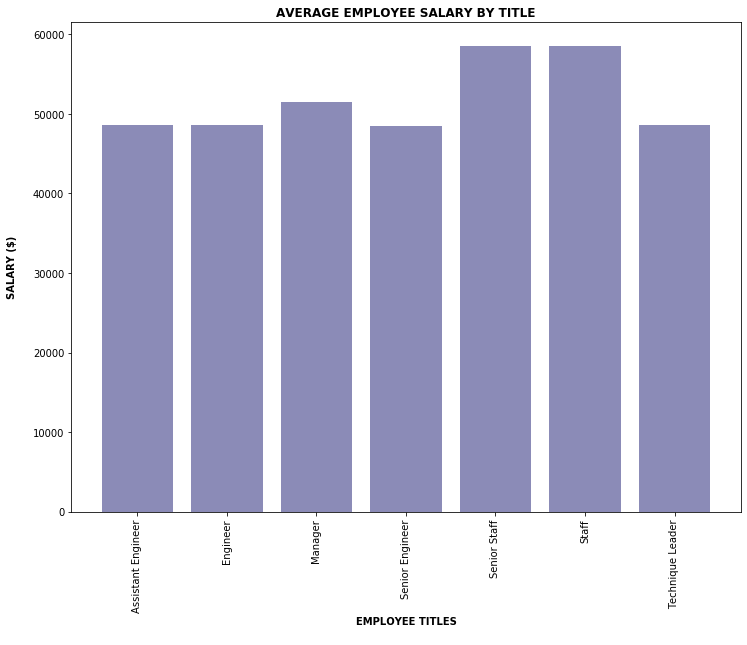

In [23]:
#Set bar chart figure size
plt.figure(figsize=(12,9))

# Set x_axis, y_axis 
x_axis = avg_sal_by_title["employee_title"]
y_axis = avg_sal_by_title["salary"]
 
# Create Bar Chart Based on Above Data
df = plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["midnightblue"])

# Create Ticks for Bar Chart's x_axis
ticks = [value for value in x_axis]
plt.xticks(ticks, x_axis, rotation=90)

# Set Labels & Title
plt.ylabel("SALARY ($)\n", weight="bold", size=10)
plt.xlabel("EMPLOYEE TITLES\n", weight="bold", size=10)

plt.title("AVERAGE EMPLOYEE SALARY BY TITLE", weight="bold", size=12)


# Save the plot
plt.savefig("./Images/avg_emp_salary_title.png")

# Show plot
plt.show()


### Epilogue : Searching for my ID number = 499942

In [14]:
new_df.query('employee_number == 499942')

,employee_number,employee_title_code,employee_title,first_name,last_name,sex,birth_date,salary
287532,499942,e0004,Technique Leader,April,Foolsday,F,1963-01-10,40000
